In [ ]:
import numpy as np
import pandas as pd
import sklearn.neighbors as neg
# import data_utils as ut

np.random.seed(777)

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict1 = pickle.load(fo, encoding='bytes')
    return dict1


Xtr, Ytr, Xte, Yte = ut.load_CIFAR10('e:/CS231n/data/')
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32*32*3)
Xte_rows = Xte.reshape(Xte.shape[0], 32*32*3)

Xte_cv = Xte_rows[:5000]
Yte_cv = Yte[:5000]
Xte_test = Xte_rows[5000:]
Yte_test = Yte[5000:]

# nn = neg.KNeighborsClassifier(n_neighbors=3, metric='manhattan', p=1)
nn.fit(Xtr_rows, Ytr)
yhat = nn.predict(Xte_cv)

print('acc: %f' % (np.mean(Yte_cv == yhat)))

class NearestNeighbor(object):
    ## 자체 함수 ##
    def __init__(self):
        pass
    
    def train(self, X, y):
        ## lazy learner !! ##
        self.Xtr = X
        self.ytr = y
        
    def predict(self, X):
        num_test = X.shape[0]
        Y_hat = np.zeros(num_test, dtype=self.ytr.dtype)
        
        ## l1 (manhattan)
        for i in range(num_test):
            dist = np.sum(np.abs(self.Xtr - X[i, :]), axis=1)
            l2_dist = np.sqrt(np.sum(np.square(self.Xtr - X[i, :]), axis=1))
            min_idx = np.argmin(dist)
            Y_hat[i] = self.Ytr[min_idx]
        
        return Y_hat

In [4]:
### Tutorial ###

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[int(len(arr) / 2)]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

quicksort([3,6,8,10,1,2,1])

[1, 1, 2, 3, 6, 8, 10]

In [8]:
a = "abc"
print(a.capitalize())
print(a.upper())
print(a.rjust(7))

Abc
ABC
    abc


In [10]:
## enumerate ##
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print("%d: %s" %(idx+1, animal))
enumerate(animals)

1: cat
2: dog
3: monkey


In [11]:
## comprehension ##
sq = [x ** 2 for x in [1,2,3,4,5]]
sq

[1, 4, 9, 16, 25]

In [12]:
## class ##
class Greeter(object):
    def __init__(self, name):
        self.name = name
    
    def greet(self, loud=False):
        if loud:
            print("hello".upper())
        else:
            print("hello")

g = Greeter('Fred') ## init 생성자함수 실행 --> 인스턴스 생성
g.greet()
g.greet(loud=True)

hello
HELLO


In [21]:
## numpy array operation ##
import numpy as np

x = np.array([[1,2], [3,4]], dtype=np.float32)
y = np.array([[5,6],[7,8]], dtype=np.float32)

print(np.multiply(x,y)) # element-wise product
print(x * y)
print(np.dot(x, y)) #dot-product or matrix multiplication
print(np.matmul(x,y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


In [26]:
# np.sum #
print(np.sum(x, axis=0))
print(np.sum(x, axis=1).T)

[4. 6.]
[3. 7.]


In [6]:
### scipy ###
import scipy as sp
from scipy.misc import imread, imsave, imresize

img = imread("E:/data/JPG/picture1.jpg")
print(img.dtype, img.shape)
img_tinted = img * [1, 0.95, 0.9] # rgb 연산 (broadcasting)
img_resize = imresize(img_tinted, (300, 300))


uint8 (250, 250, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

x = np.array([[0,1], [1,0], [2,0]])
d = squareform(pdist(x, 'euclidean'))
d

array([[0.        , 1.41421356, 2.23606798],
       [1.41421356, 0.        , 1.        ],
       [2.23606798, 1.        , 0.        ]])

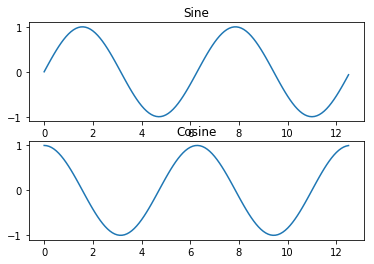

In [17]:
### matplotlib ###
import matplotlib.pyplot as plt

x = np.arange(0, 4*np.pi, 0.1) # 주기2
sin = np.sin(x)
cos = np.cos(x)

plt.subplot(2, 1, 1) # 높이가 2, 너비가 1, plot num 1
plt.plot(x, sin)
plt.title('Sine')
plt.subplot(2, 1, 2) #높이가 2, 너비가 1, plot num 2
plt.plot(x, cos)
plt.title('Cosine')
plt.show()